In [106]:
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from sklearn.metrics import classification_report, confusion_matrix

In [107]:
# Load the trained classifier
clf = joblib.load("model/ai_ws_classifier.joblib")

In [108]:
# Automatically load all labeled ws_capture CSVs
csv_files = glob.glob("data-ws/ws_capture_*_labeled_*.csv")
df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
print(f"Loaded {len(df)} flows from {len(csv_files)} files.")

Loaded 1219 flows from 532 files.


/var/folders/36/9897zdqx7851xfw34z3vf8s00000gr/T/ipykernel_18232/2943314244.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)


In [109]:
# Select relevant features
features = ["duration", "c_to_s_pkts", "s_to_c_pkts", "c_to_s_bytes", "s_to_c_bytes"]
X = df[features]

In [110]:
# Predict labels
df["predicted_label"] = clf.predict(X)

In [111]:
df["label"] = pd.to_numeric(df["label"], errors="coerce")  # Convert to numeric
df["predicted_label"] = pd.to_numeric(df["predicted_label"], errors="coerce")
df = df.dropna(subset=["label", "predicted_label"])  # Drop bad rows
df["label"] = df["label"].astype(int)
df["predicted_label"] = df["predicted_label"].astype(int)

In [112]:
# Print classification report
print(classification_report(df["label"], df["predicted_label"]))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       384
           1       0.99      0.99      0.99       835

    accuracy                           0.99      1219
   macro avg       0.99      0.99      0.99      1219
weighted avg       0.99      0.99      0.99      1219



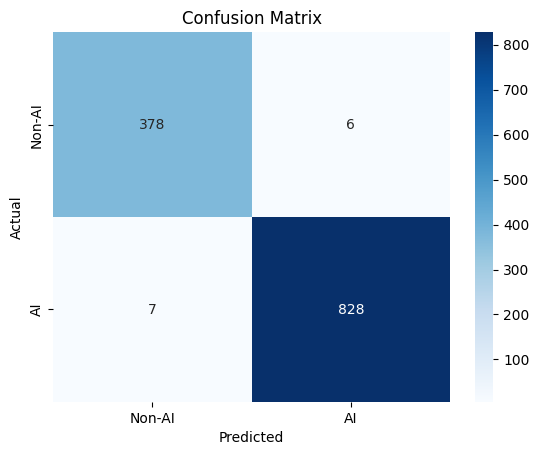

In [113]:
# Confusion matrix heatmap
cm = confusion_matrix(df["label"], df["predicted_label"])
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Non-AI", "AI"], yticklabels=["Non-AI", "AI"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('confusion_matrix_rf_ws.png')
plt.show()

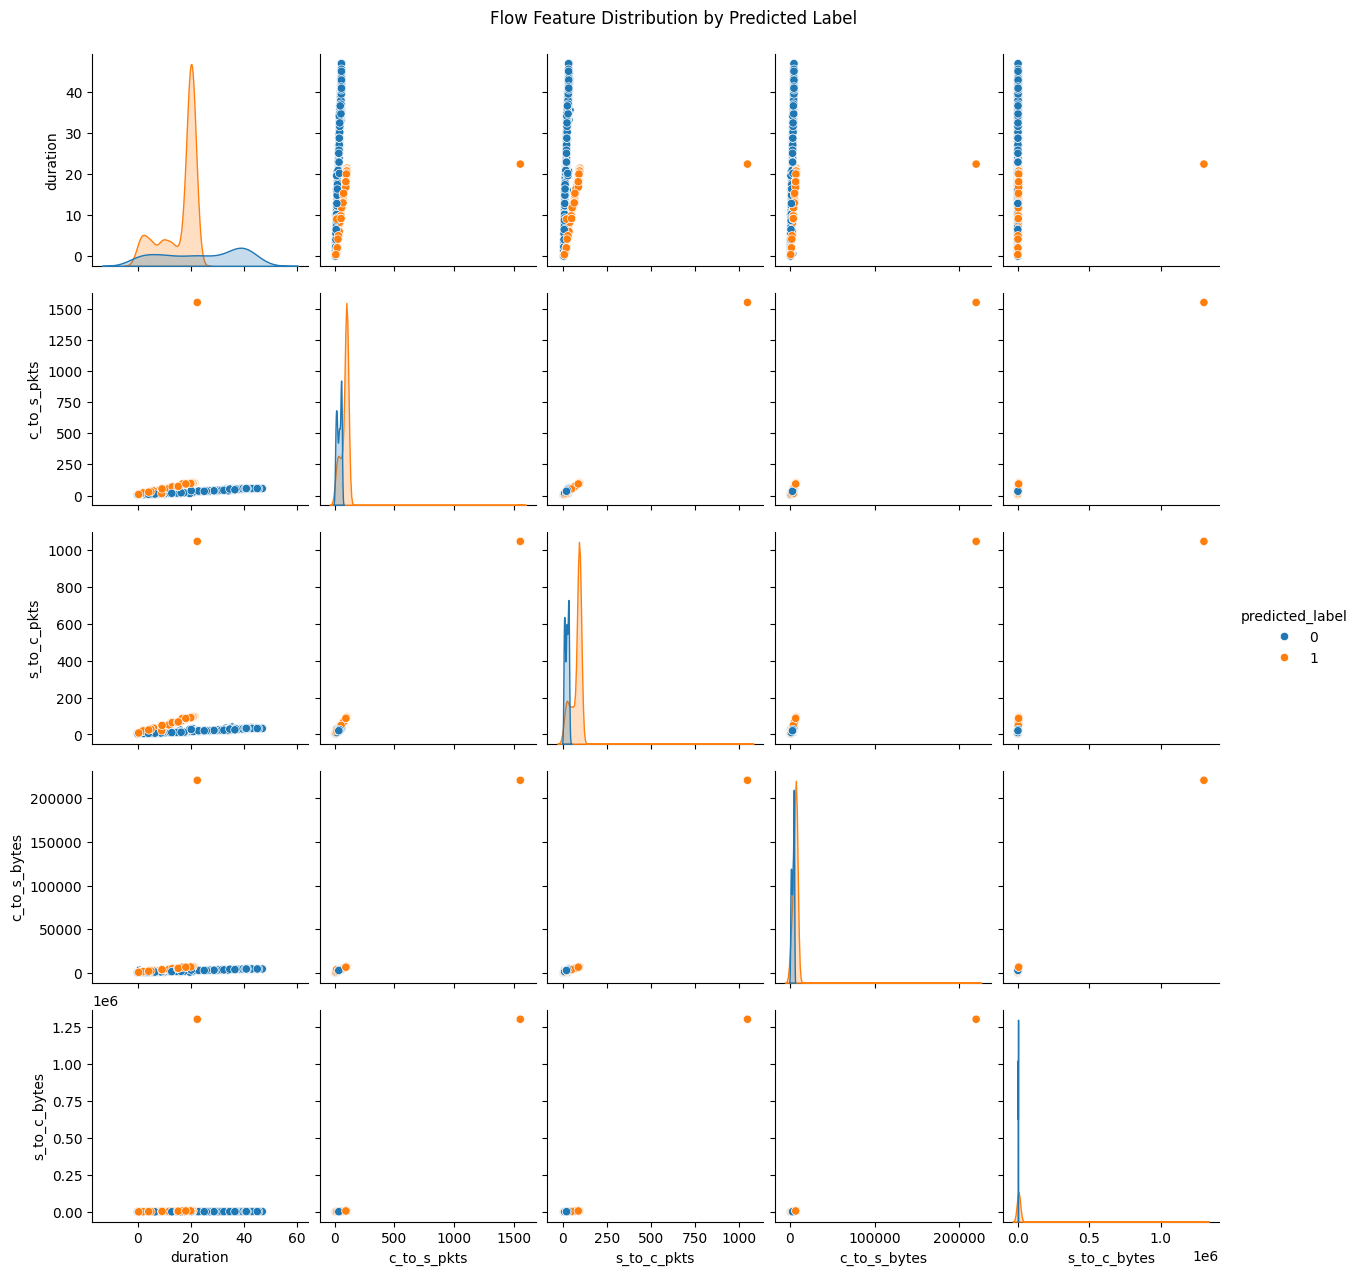

In [114]:
# Pairplot visualization
sns.pairplot(df, vars=features, hue="predicted_label")
plt.suptitle("Flow Feature Distribution by Predicted Label", y=1.02)
plt.savefig('pairplot_rf_ws.png')
plt.show()

In [115]:
# Load the trained classifier
clf = joblib.load("model/ai_ws_classifier_logistic.joblib")

In [116]:
# Predict labels
df["predicted_label"] = clf.predict(X)

In [117]:
df["label"] = pd.to_numeric(df["label"], errors="coerce")  # Convert to numeric
df["predicted_label"] = pd.to_numeric(df["predicted_label"], errors="coerce")
df = df.dropna(subset=["label", "predicted_label"])  # Drop bad rows
df["label"] = df["label"].astype(int)
df["predicted_label"] = df["predicted_label"].astype(int)

In [118]:
# Print classification report
print(classification_report(df["label"], df["predicted_label"]))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       384
           1       0.99      0.97      0.98       835

    accuracy                           0.98      1219
   macro avg       0.97      0.98      0.97      1219
weighted avg       0.98      0.98      0.98      1219



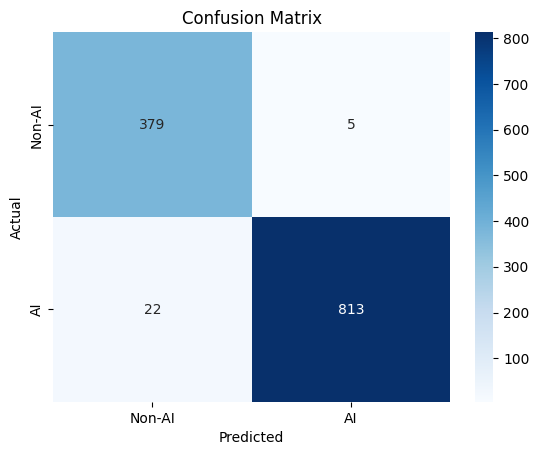

In [119]:
# Confusion matrix heatmap
cm = confusion_matrix(df["label"], df["predicted_label"])
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Non-AI", "AI"], yticklabels=["Non-AI", "AI"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('confusion_matrix_lr_ws.png')
plt.show()

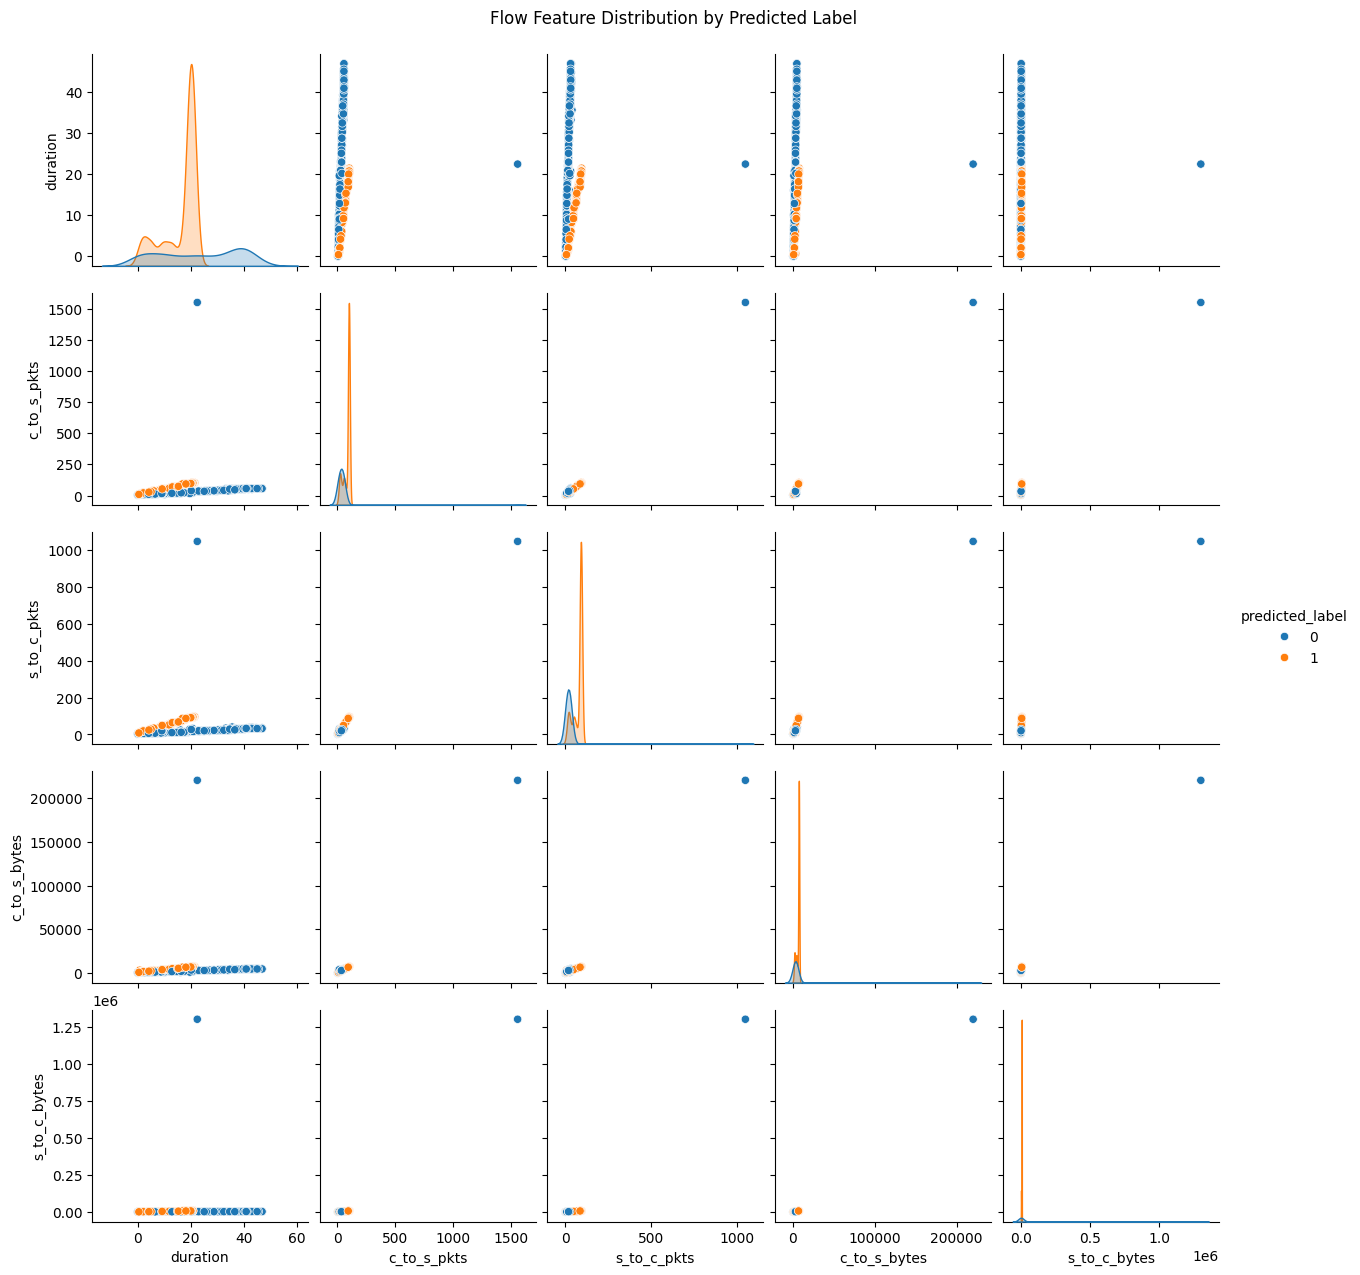

In [120]:
# Pairplot visualization
sns.pairplot(df, vars=features, hue="predicted_label")
plt.suptitle("Flow Feature Distribution by Predicted Label", y=1.02)
plt.savefig('pairplot_lr_ws.png')
plt.show()

In [121]:
# Load the trained classifier
clf = joblib.load("model/ai_wss_classifier.joblib")

In [122]:
# Automatically load all labeled ws_capture CSVs
csv_files = glob.glob("data-wss/wss_capture_*_labeled_*.csv")
df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
print(f"Loaded {len(df)} flows from {len(csv_files)} files.")

/var/folders/36/9897zdqx7851xfw34z3vf8s00000gr/T/ipykernel_18232/874824174.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)


Loaded 3966 flows from 1919 files.


In [123]:
# Select relevant features
features = ["duration", "c_to_s_pkts", "s_to_c_pkts", "c_to_s_bytes", "s_to_c_bytes"]
X = df[features]

In [124]:
# Predict labels
df["predicted_label"] = clf.predict(X)

In [125]:
df["label"] = pd.to_numeric(df["label"], errors="coerce")  # Convert to numeric
df["predicted_label"] = pd.to_numeric(df["predicted_label"], errors="coerce")
df = df.dropna(subset=["label", "predicted_label"])  # Drop bad rows
df["label"] = df["label"].astype(int)
df["predicted_label"] = df["predicted_label"].astype(int)

In [126]:
# Print classification report
print(classification_report(df["label"], df["predicted_label"]))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1657
           1       0.99      0.99      0.99      2309

    accuracy                           0.99      3966
   macro avg       0.99      0.99      0.99      3966
weighted avg       0.99      0.99      0.99      3966



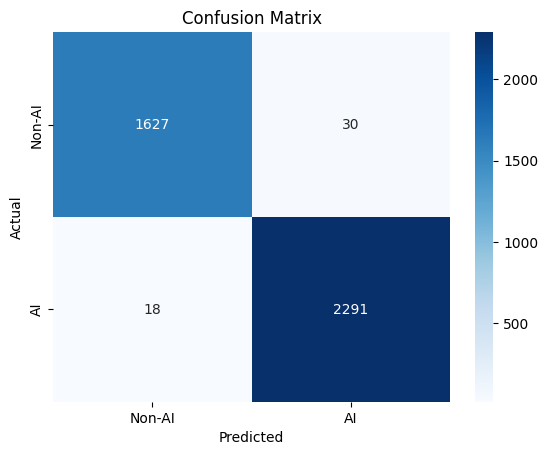

In [127]:
# Confusion matrix heatmap
cm = confusion_matrix(df["label"], df["predicted_label"])
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Non-AI", "AI"], yticklabels=["Non-AI", "AI"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('confusion_matrix_rf_wss.png')
plt.show()

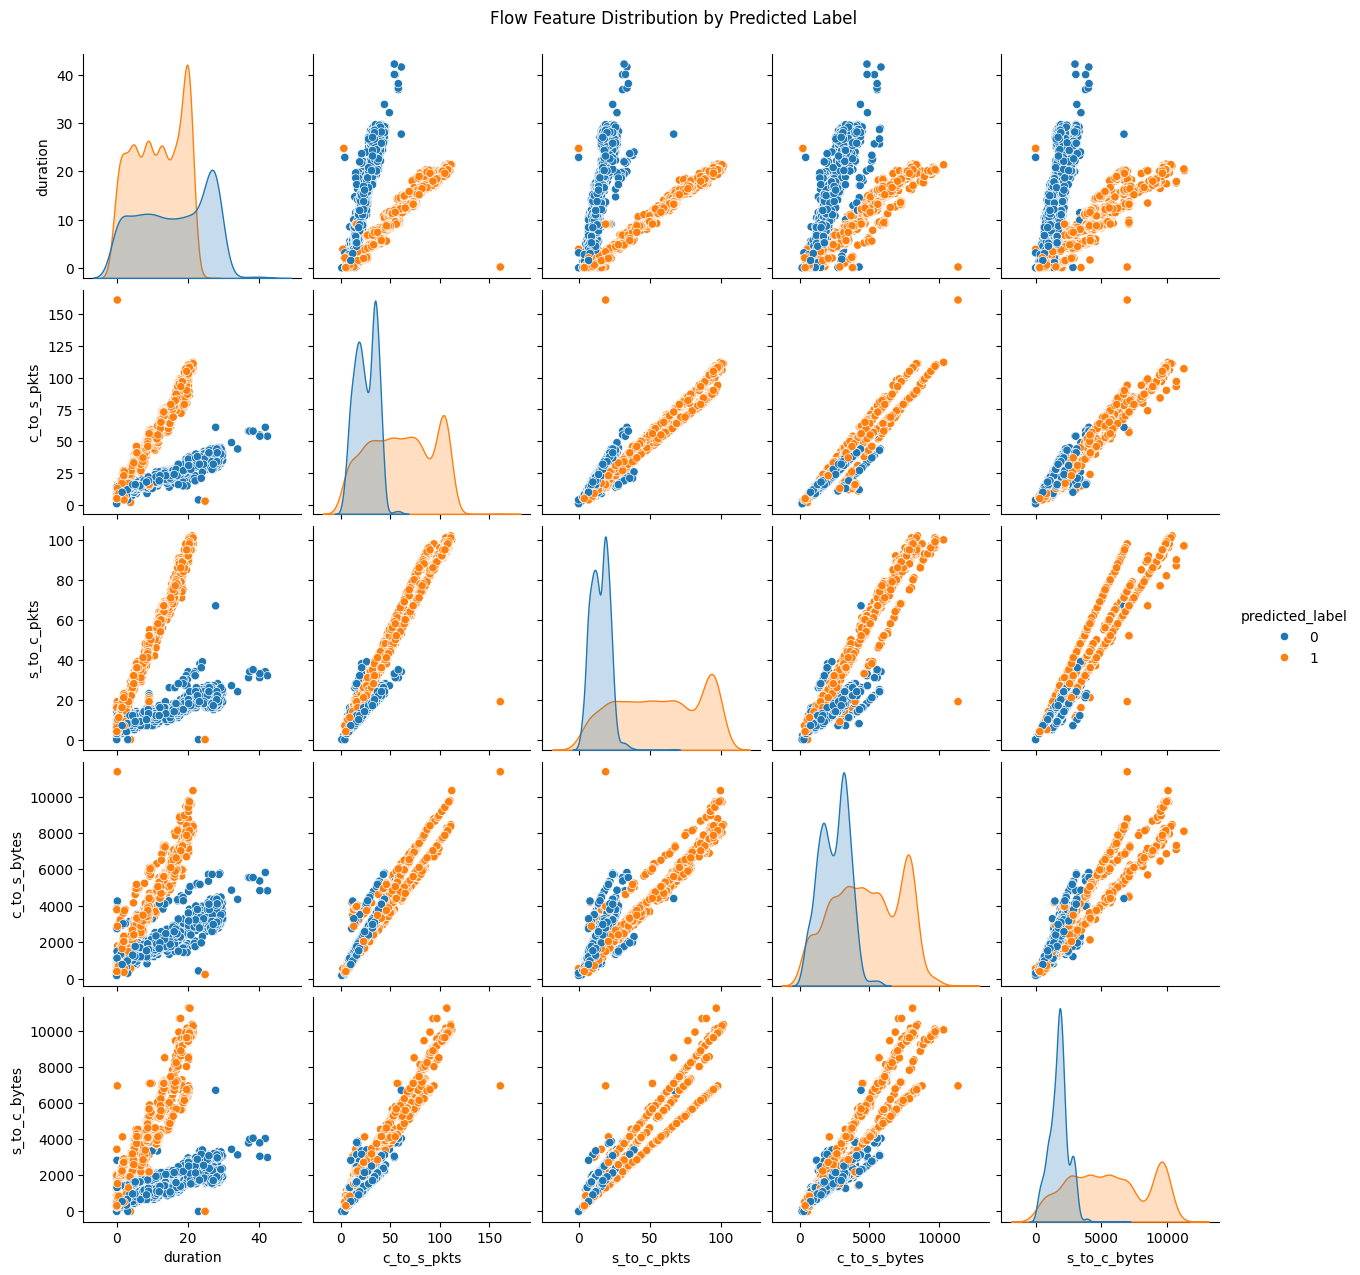

In [128]:
# Pairplot visualization
sns.pairplot(df, vars=features, hue="predicted_label")
plt.suptitle("Flow Feature Distribution by Predicted Label", y=1.02)
plt.savefig('pairplot_rf_wss.png')
plt.show()

In [129]:
# Load the trained classifier
clf = joblib.load("model/ai_wss_classifier_logistic.joblib")

In [130]:
# Predict labels
df["predicted_label"] = clf.predict(X)

In [131]:
df["label"] = pd.to_numeric(df["label"], errors="coerce")  # Convert to numeric
df["predicted_label"] = pd.to_numeric(df["predicted_label"], errors="coerce")
df = df.dropna(subset=["label", "predicted_label"])  # Drop bad rows
df["label"] = df["label"].astype(int)
df["predicted_label"] = df["predicted_label"].astype(int)

In [132]:
# Print classification report
print(classification_report(df["label"], df["predicted_label"]))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1657
           1       0.98      0.96      0.97      2309

    accuracy                           0.97      3966
   macro avg       0.97      0.97      0.97      3966
weighted avg       0.97      0.97      0.97      3966



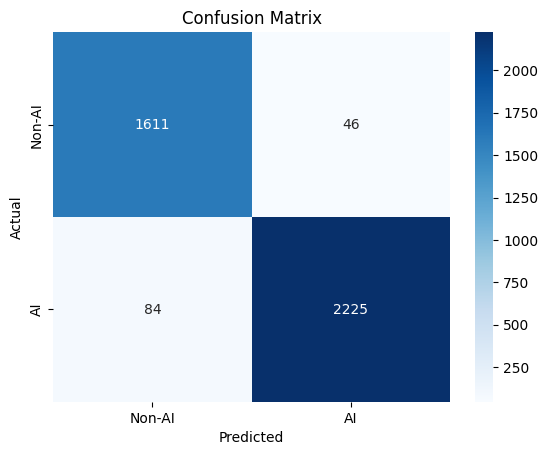

In [133]:
# Confusion matrix heatmap
cm = confusion_matrix(df["label"], df["predicted_label"])
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Non-AI", "AI"], yticklabels=["Non-AI", "AI"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('confusion_matrix_lr_wss.png')
plt.show()

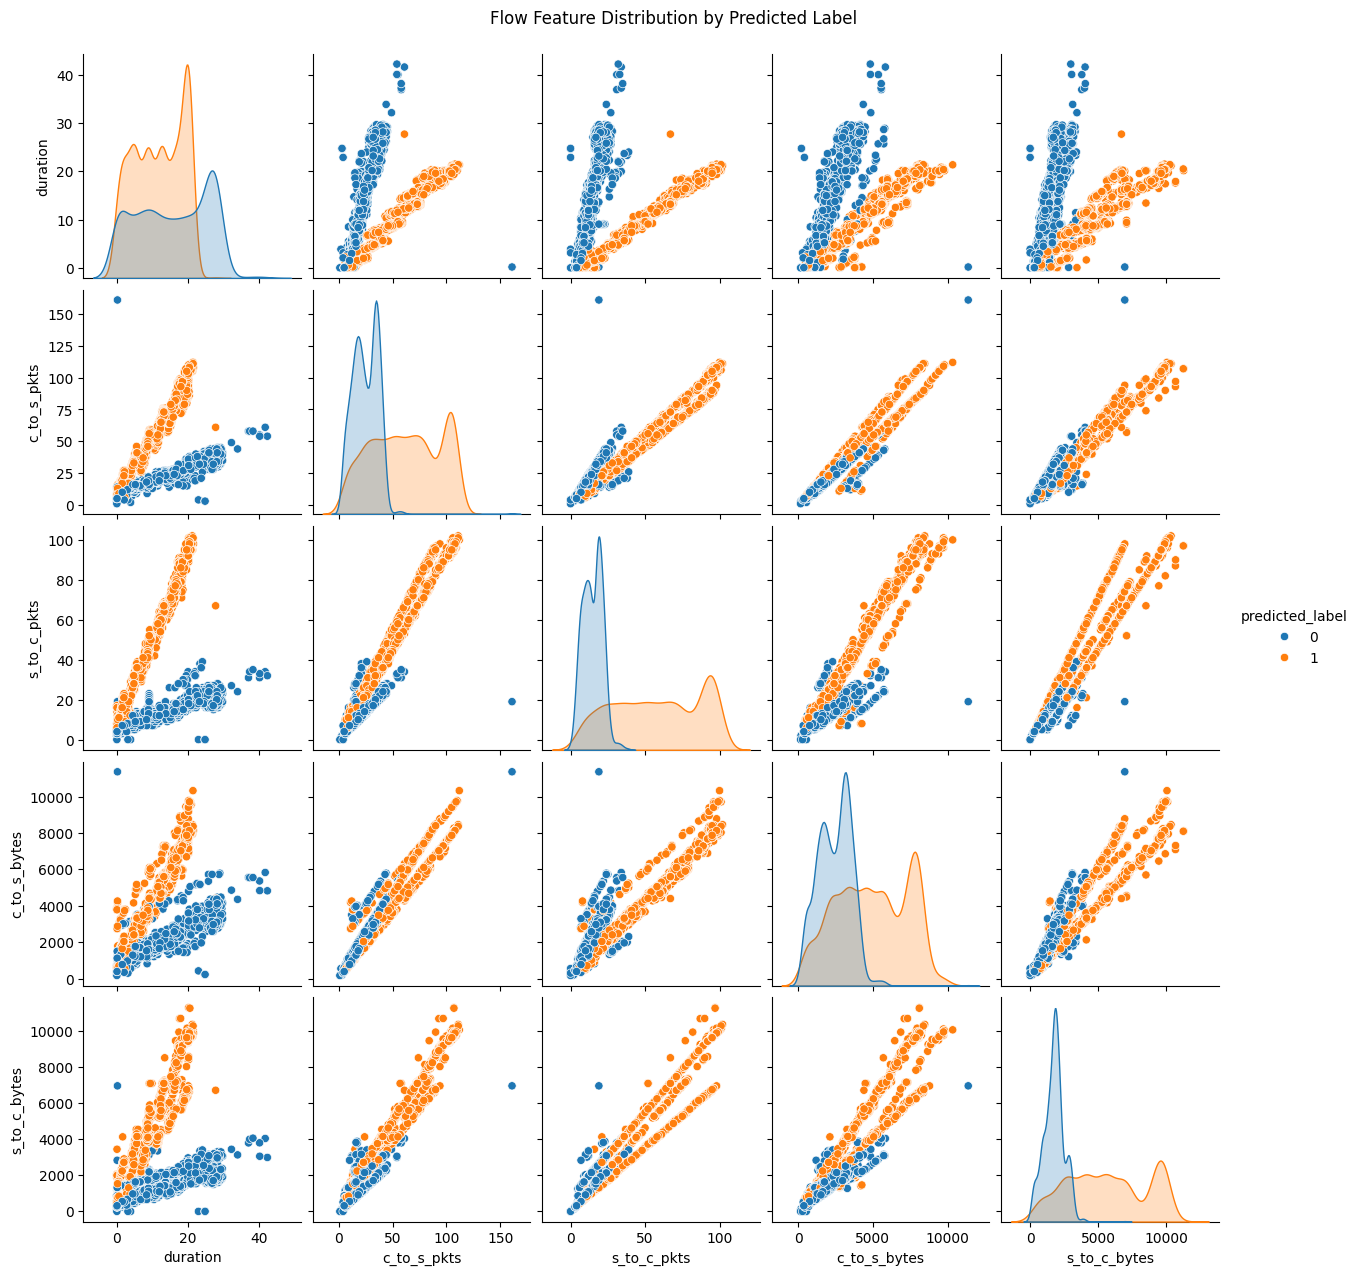

In [134]:
# Pairplot visualization
sns.pairplot(df, vars=features, hue="predicted_label")
plt.suptitle("Flow Feature Distribution by Predicted Label", y=1.02)
plt.savefig('pairplot_lr_wss.png')
plt.show()